# Анализ данных для предсказания результатов экзаменов школьников

Задачей проекта является проведение EDA (разведывательного анализа данных) на примере датасета содержащего информацию об учениках американских школ. 
В процессе анализа необходимо выяснить влияние условий жизни и учебы школьников на их оценки по математике для создания модели предсказывающей что ученик находится в группе риска и может плохо сдать математику.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

dk = pd.read_csv('stud_math.csv') # dk - data kids

In [3]:
display(dk.head(10))
dk.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
# переименуем один столбец для удобства
dk.rename(columns={'studytime, granular': 'st_gran'}, inplace=True)


## Колонка school

In [5]:
pd.DataFrame(dk.school.value_counts())

,school
GP,349
MS,46


Данные есть по двум школам. В последствии можно посмотреть в какой школе получают лучшие оценки. 

## Колонка sex

In [6]:
pd.DataFrame(dk.sex.value_counts())

,sex
F,208
M,187


Девочек в выборке немного больше чем мальчиков (примерно на 11%)

## Колонка age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

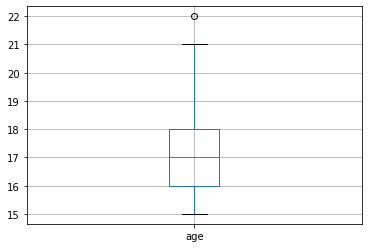

In [7]:
dk.age.plot(kind = 'box', grid = True)
dk.age.describe()

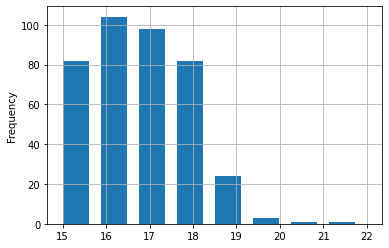

In [8]:
dk.age.plot(kind = 'hist', grid = True, width = 0.6, bins = 8)

Основная масса студентов имеет возраст от 15-ти до 18 лет. При этом видим что возраст в 22 года является выбросом. Исключим данные о 22-ух летних студентах из нашего набора.

In [9]:
dk = dk[(dk.age < 22)]

# Колонка address

Отметим что в колонке имеются NaN. Здесь и далее количество строк с NaN считается как разница количества строк и количества ненулевых значений для данной колонки. Данные о количестве строк и ненулевых значений обновляются после фильтрации выбросов в процессе первичного анализа данных. Перед проверкой каждой колонки запускаю dk.info() смотрю разницу. Можно конечно выводить данные не по всему датасету а по отдельной колонке, но мне удобнее контролировать изменения всей таблицы

In [10]:
pd.DataFrame(dk.address.value_counts())

,address
U,294
R,83


Примерно 75% студентов живут в городе, 21% за городом и по 4% процентам данных нет. Примем что эти 4% тоже живут в городе, что минимально отразится результатах

In [11]:
dk.address.fillna('U', inplace = True)
pd.DataFrame(dk.address.value_counts())

,address
U,311
R,83


## Колонка famsize

In [12]:
pd.DataFrame(dk.famsize.value_counts())

,famsize
GT3,260
LE3,107


У 66% студентов в семье больше трех человек, у 27% - меньше трех, по 7% процентам данных нет. В данном случае 7% могут довльно сильно исказить картину поэтому заменим значения NaN на no_data

In [13]:
dk.famsize.fillna('no_data', inplace = True)

## Колонка Pstatus

In [14]:
pd.DataFrame(dk.Pstatus.value_counts())

,Pstatus
T,313
A,36


 79.5% студентов живут в полных семьях, 9% - в неполных, 11.5% - данных нет. Здесь также заменим NaN на no_data

In [15]:
dk.Pstatus.fillna('no_data', inplace = True)

## Колонка Medu

count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

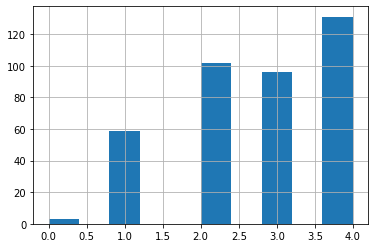

In [16]:
dk.Medu.hist()
dk.Medu.describe()

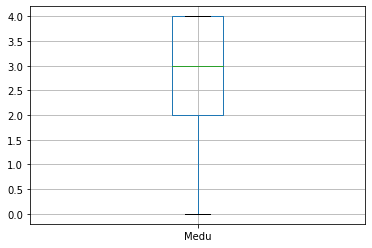

In [17]:
dk.Medu.plot(kind = 'box', grid = True)

  На графиках видим распределение качества образования матерей студентов. Порядка 33% имеют высшее образование, 24% имеют среднее специальное или 11 классов, около 26% окончили от 5 до 9 классов. Остальные либо не имеют образования либо отучились немного. Выбросов нет. 
  Отсутсвующие значения (менее процента) заполним значением медианы.

In [18]:
dk.Medu.fillna(dk.Medu.median(), inplace = True)

In [19]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      394 non-null    object 
 1   sex         394 non-null    object 
 2   age         394 non-null    int64  
 3   address     394 non-null    object 
 4   famsize     394 non-null    object 
 5   Pstatus     394 non-null    object 
 6   Medu        394 non-null    float64
 7   Fedu        370 non-null    float64
 8   Mjob        375 non-null    object 
 9   Fjob        358 non-null    object 
 10  reason      377 non-null    object 
 11  guardian    363 non-null    object 
 12  traveltime  366 non-null    float64
 13  studytime   387 non-null    float64
 14  failures    372 non-null    float64
 15  schoolsup   385 non-null    object 
 16  famsup      355 non-null    object 
 17  paid        354 non-null    object 
 18  activities  380 non-null    object 
 19  nursery     378 non-null    o

## Колонка Fedu

count    370.000000
mean       2.618919
std        2.230163
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

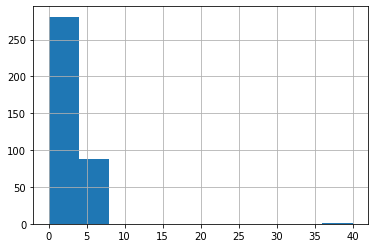

In [20]:
dk.Fedu.hist()
dk.Fedu.describe()

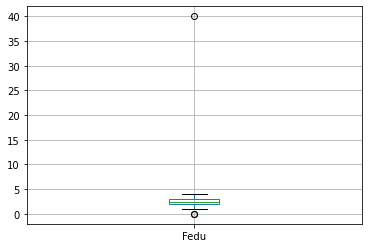

In [21]:
dk.Fedu.plot(kind = 'box', grid = True)

Значение 40 явная ошибка. Убираем и смотрим на распределение снова. Значение "0" пока не трогаем

In [22]:
dk = dk[(dk.Fedu != 40)]

count    369.000000
mean       2.517615
std        1.086147
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

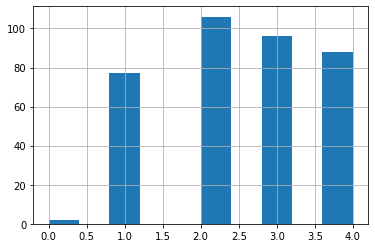

In [23]:
dk.Fedu.hist()
dk.Fedu.describe()

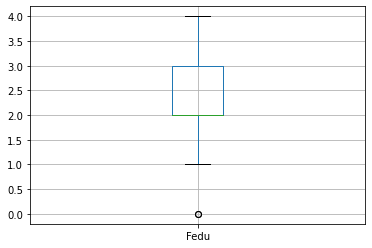

In [24]:
dk.Fedu.plot(kind = 'box', grid = True)

А мамаши-то пообразованнее будут. Отцов без образования исключаем как выбросы. Как поступить с NaN не представляю. Отсутствует порядка 6%. Надо взять среднее и округлить до трех или взять медиану? Пожалуй просто заменю на no_data

In [25]:
dk = dk[(dk.Fedu > 0)]
dk.Fedu.fillna('no_data', inplace = True)

In [26]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      367 non-null    object 
 1   sex         367 non-null    object 
 2   age         367 non-null    int64  
 3   address     367 non-null    object 
 4   famsize     367 non-null    object 
 5   Pstatus     367 non-null    object 
 6   Medu        367 non-null    float64
 7   Fedu        367 non-null    float64
 8   Mjob        348 non-null    object 
 9   Fjob        333 non-null    object 
 10  reason      351 non-null    object 
 11  guardian    337 non-null    object 
 12  traveltime  342 non-null    float64
 13  studytime   360 non-null    float64
 14  failures    349 non-null    float64
 15  schoolsup   358 non-null    object 
 16  famsup      332 non-null    object 
 17  paid        330 non-null    object 
 18  activities  353 non-null    object 
 19  nursery     351 non-null    o

## Колонка Mjob


In [27]:
pd.DataFrame(dk.Mjob.value_counts())

,Mjob
other,124
services,89
at_home,57
teacher,47
health,31


Интересно что скрывается за other. Думаю что не ошибусь добавив 5% NaN в other

In [28]:
dk.Mjob.fillna('other', inplace = True)

## Колонка Fjob

In [29]:
pd.DataFrame(dk.Fjob.value_counts())

,Fjob
other,187
services,93
teacher,26
at_home,14
health,13


Аналогично предыдущей колонке заменим NaN на Other (NaN - 9%, но отрыв other от services двукратный, поэтому замена обоснована)

In [30]:
dk.Fjob.fillna('other', inplace = True)

## Колонка reason

In [31]:
pd.DataFrame(dk.reason.value_counts())

,reason
course,127
reputation,97
home,96
other,31


NaN - 4%. Присвоим им значение course

In [32]:
dk.reason.fillna('other', inplace = True)

## Колонка guardian

In [33]:
pd.DataFrame(dk.guardian.value_counts())

,guardian
mother,233
father,78
other,26


Не понимаю что такое опекун. Если в семье и отец и мать, а таких почти 80%, как мы выяснили выше, то почему опекун один? В любом случае 9% NaN заменим значением mother

In [34]:
dk.guardian.fillna('mother', inplace = True)

## Колонка traveltime

count    342.000000
mean       1.447368
std        0.703057
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

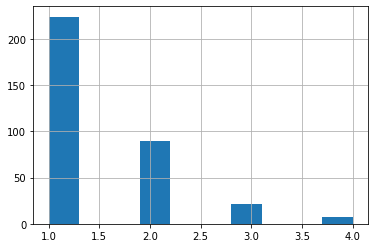

In [35]:
dk.traveltime.hist()
dk.traveltime.describe()

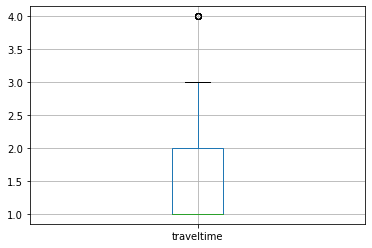

In [36]:
dk.traveltime.plot(kind = 'box', grid = True)

Студенты добирающиеся до школы больше часа (значение 4) в данном случае являются выбросом

In [37]:
dk = dk[(dk.traveltime != 4)]

7% NaN заменим самым частым значением равным единице

In [38]:
dk.traveltime.fillna(1.0, inplace = True)

In [39]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     360 non-null    object 
 5   Pstatus     360 non-null    object 
 6   Medu        360 non-null    float64
 7   Fedu        360 non-null    float64
 8   Mjob        360 non-null    object 
 9   Fjob        360 non-null    object 
 10  reason      360 non-null    object 
 11  guardian    360 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   353 non-null    float64
 14  failures    343 non-null    float64
 15  schoolsup   351 non-null    object 
 16  famsup      328 non-null    object 
 17  paid        324 non-null    object 
 18  activities  346 non-null    object 
 19  nursery     344 non-null    o

## Колонка studytime

count    353.000000
mean       2.025496
std        0.830475
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

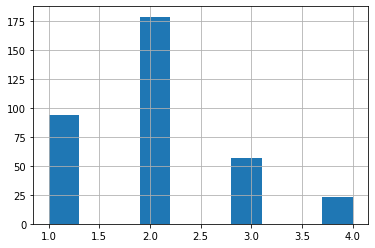

In [40]:
dk.studytime.hist()
dk.studytime.describe()

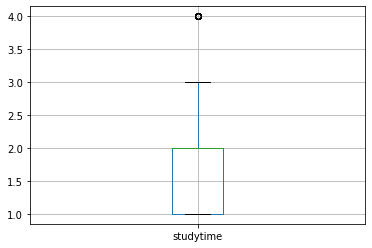

In [41]:
dk.studytime.plot(kind = 'box', grid = True)

 Студентов занимающихся более 10 часов в неделю (значение 4) 23 человека и хотя формально это выброс, исключать это значение не будем, т.к. это целых 6% оставшейся выборки. Пустые значения (2%) заполним медианой (она близка к средней)

In [42]:
dk.studytime.fillna(2.0, inplace = True)

In [43]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     360 non-null    object 
 5   Pstatus     360 non-null    object 
 6   Medu        360 non-null    float64
 7   Fedu        360 non-null    float64
 8   Mjob        360 non-null    object 
 9   Fjob        360 non-null    object 
 10  reason      360 non-null    object 
 11  guardian    360 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   360 non-null    float64
 14  failures    343 non-null    float64
 15  schoolsup   351 non-null    object 
 16  famsup      328 non-null    object 
 17  paid        324 non-null    object 
 18  activities  346 non-null    object 
 19  nursery     344 non-null    o

## Колонка failures

count    343.000000
mean       0.317784
std        0.714023
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

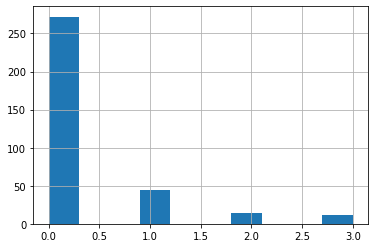

In [44]:
dk.failures.hist()
dk.failures.describe()

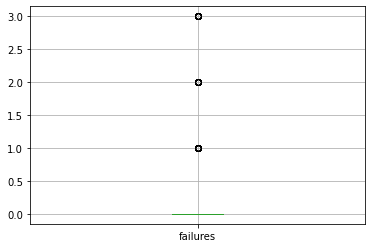

In [45]:
dk.failures.plot(kind = 'box', grid = True)

Тут опять не знаю как поступить. Формально значения 1 2 и 3 являются выбросами. Очевидно что значение 1 исключать нельзя, остальные не знаю, оставлю все значения, хочется все таки узнать как внеучебные неудачи влияют на оценку. Надеюсь в комментарии к заданию вы напишете как правильно поступить в данном случае. 
Пустые значения заполним значением 0, т.к. абсолютное большинство после школы не испытывает неудач.

In [46]:
dk.failures.fillna(0.0, inplace = True)

In [47]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     360 non-null    object 
 5   Pstatus     360 non-null    object 
 6   Medu        360 non-null    float64
 7   Fedu        360 non-null    float64
 8   Mjob        360 non-null    object 
 9   Fjob        360 non-null    object 
 10  reason      360 non-null    object 
 11  guardian    360 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   360 non-null    float64
 14  failures    360 non-null    float64
 15  schoolsup   351 non-null    object 
 16  famsup      328 non-null    object 
 17  paid        324 non-null    object 
 18  activities  346 non-null    object 
 19  nursery     344 non-null    o

## Колонка schoolsup

In [48]:
pd.DataFrame(dk.schoolsup.value_counts())

,schoolsup
no,306
yes,45


Подавляющее большинство не имеет дополнительной образовательной поддержки. 2.5% пустых значений отнесем к этой же группе студентов

In [49]:
dk.schoolsup.fillna('no', inplace = True)

In [50]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     360 non-null    object 
 5   Pstatus     360 non-null    object 
 6   Medu        360 non-null    float64
 7   Fedu        360 non-null    float64
 8   Mjob        360 non-null    object 
 9   Fjob        360 non-null    object 
 10  reason      360 non-null    object 
 11  guardian    360 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   360 non-null    float64
 14  failures    360 non-null    float64
 15  schoolsup   360 non-null    object 
 16  famsup      328 non-null    object 
 17  paid        324 non-null    object 
 18  activities  346 non-null    object 
 19  nursery     344 non-null    o

## Колонка famsup

In [51]:
pd.DataFrame(dk.famsup.value_counts())

,famsup
yes,201
no,127


Почти 9% пустых значений при соотношении 60:40 у имеющих и не имеющих семейную образовательную поддержку. Присвоим значение no_data всем пустым значениям.

In [52]:
dk.famsup.fillna('no_data', inplace = True)

In [53]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     360 non-null    object 
 5   Pstatus     360 non-null    object 
 6   Medu        360 non-null    float64
 7   Fedu        360 non-null    float64
 8   Mjob        360 non-null    object 
 9   Fjob        360 non-null    object 
 10  reason      360 non-null    object 
 11  guardian    360 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   360 non-null    float64
 14  failures    360 non-null    float64
 15  schoolsup   360 non-null    object 
 16  famsup      360 non-null    object 
 17  paid        324 non-null    object 
 18  activities  346 non-null    object 
 19  nursery     344 non-null    o

## Колонка paid

In [54]:
pd.DataFrame(dk.paid.value_counts())

,paid
no,182
yes,142


Ситуация аналогична предыдущей: 10% - NaN и близкие значения количества студентов посещавших платные уроки математики и не посещавших. Все NaN - no_data

In [55]:
dk.paid.fillna('no_data', inplace = True)

In [56]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     360 non-null    object 
 5   Pstatus     360 non-null    object 
 6   Medu        360 non-null    float64
 7   Fedu        360 non-null    float64
 8   Mjob        360 non-null    object 
 9   Fjob        360 non-null    object 
 10  reason      360 non-null    object 
 11  guardian    360 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   360 non-null    float64
 14  failures    360 non-null    float64
 15  schoolsup   360 non-null    object 
 16  famsup      360 non-null    object 
 17  paid        360 non-null    object 
 18  activities  346 non-null    object 
 19  nursery     344 non-null    o

## Колонка activities

In [57]:
pd.DataFrame(dk.activities.value_counts())

,activities
yes,174
no,172


Ясно-понятно

In [58]:
dk.activities.fillna('no_data', inplace = True)

In [59]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     360 non-null    object 
 5   Pstatus     360 non-null    object 
 6   Medu        360 non-null    float64
 7   Fedu        360 non-null    float64
 8   Mjob        360 non-null    object 
 9   Fjob        360 non-null    object 
 10  reason      360 non-null    object 
 11  guardian    360 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   360 non-null    float64
 14  failures    360 non-null    float64
 15  schoolsup   360 non-null    object 
 16  famsup      360 non-null    object 
 17  paid        360 non-null    object 
 18  activities  360 non-null    object 
 19  nursery     344 non-null    o

## Колонка nursery

In [60]:
pd.DataFrame(dk.nursery.value_counts())

,nursery
yes,271
no,73


21% детишек не ходили в садик, а как же социализация. Возьмем на себя смелость предположить что 4% о которых мы не знаем все таки ходили в садик

In [61]:
dk.nursery.fillna('yes', inplace = True)

In [62]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     360 non-null    object 
 5   Pstatus     360 non-null    object 
 6   Medu        360 non-null    float64
 7   Fedu        360 non-null    float64
 8   Mjob        360 non-null    object 
 9   Fjob        360 non-null    object 
 10  reason      360 non-null    object 
 11  guardian    360 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   360 non-null    float64
 14  failures    360 non-null    float64
 15  schoolsup   360 non-null    object 
 16  famsup      360 non-null    object 
 17  paid        360 non-null    object 
 18  activities  360 non-null    object 
 19  nursery     360 non-null    o

## Колонка studytime, granular (st_gran) загадочная

count    353.000000
mean      -6.076487
std        2.491426
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: st_gran, dtype: float64

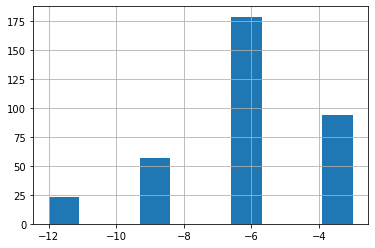

In [63]:
dk.st_gran.hist()
dk.st_gran.describe()

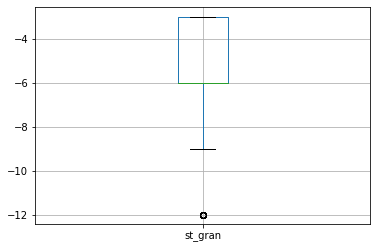

In [64]:
dk.st_gran.plot(kind = 'box', grid = True)

Погуглил. Возможно это данные получены гранулярным методом анализа временной последовательности, навроде как соотносятся часы учебы по понедельникам, по вторникам и т.д. Или нет. В любом случае для анализа эту колонку использовать не будем.

In [65]:
dk.drop(['st_gran'], inplace = True, axis = 1)

In [66]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     360 non-null    object 
 5   Pstatus     360 non-null    object 
 6   Medu        360 non-null    float64
 7   Fedu        360 non-null    float64
 8   Mjob        360 non-null    object 
 9   Fjob        360 non-null    object 
 10  reason      360 non-null    object 
 11  guardian    360 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   360 non-null    float64
 14  failures    360 non-null    float64
 15  schoolsup   360 non-null    object 
 16  famsup      360 non-null    object 
 17  paid        360 non-null    object 
 18  activities  360 non-null    object 
 19  nursery     360 non-null    o

## Колонка higher

In [67]:
pd.DataFrame(dk.higher.value_counts())

,higher
yes,328
no,17


Все хотят быть образованными в Америке, ну кредит за учебу будут лет 10 отдавать. Отправим 15 человек без данных в желающих получить вышку

In [68]:
dk.higher.fillna('yes', inplace = True)

In [69]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     360 non-null    object 
 5   Pstatus     360 non-null    object 
 6   Medu        360 non-null    float64
 7   Fedu        360 non-null    float64
 8   Mjob        360 non-null    object 
 9   Fjob        360 non-null    object 
 10  reason      360 non-null    object 
 11  guardian    360 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   360 non-null    float64
 14  failures    360 non-null    float64
 15  schoolsup   360 non-null    object 
 16  famsup      360 non-null    object 
 17  paid        360 non-null    object 
 18  activities  360 non-null    object 
 19  nursery     360 non-null    o

## Колонка internet

In [70]:
pd.DataFrame(dk.higher.value_counts())

,higher
yes,343
no,17


9% NaN, довольно много, но судя по распределению наверняка у подавляющей части есть интернет. Смело пишем их в пользователи всемирной паутины 

In [71]:
dk.internet.fillna('yes', inplace = True)

In [72]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     360 non-null    object 
 5   Pstatus     360 non-null    object 
 6   Medu        360 non-null    float64
 7   Fedu        360 non-null    float64
 8   Mjob        360 non-null    object 
 9   Fjob        360 non-null    object 
 10  reason      360 non-null    object 
 11  guardian    360 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   360 non-null    float64
 14  failures    360 non-null    float64
 15  schoolsup   360 non-null    object 
 16  famsup      360 non-null    object 
 17  paid        360 non-null    object 
 18  activities  360 non-null    object 
 19  nursery     360 non-null    o

## Колонка romantic

In [73]:
pd.DataFrame(dk.romantic.value_counts())

,romantic
no,222
yes,110


Количество учащихся без отношений в два раза больше чем в отношениях. 8% наверное постеснялись сказать что одиноки, но мы все равно запишем их в большинство.

In [74]:
dk.romantic.fillna('no', inplace = True)

In [75]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     360 non-null    object 
 5   Pstatus     360 non-null    object 
 6   Medu        360 non-null    float64
 7   Fedu        360 non-null    float64
 8   Mjob        360 non-null    object 
 9   Fjob        360 non-null    object 
 10  reason      360 non-null    object 
 11  guardian    360 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   360 non-null    float64
 14  failures    360 non-null    float64
 15  schoolsup   360 non-null    object 
 16  famsup      360 non-null    object 
 17  paid        360 non-null    object 
 18  activities  360 non-null    object 
 19  nursery     360 non-null    o

## Колонка famrel

count    336.000000
mean       3.937500
std        0.933118
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

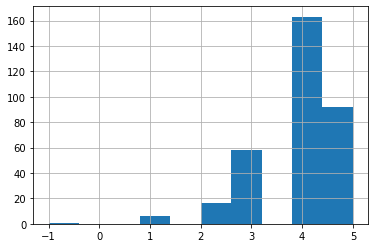

In [76]:
dk.famrel.hist()
dk.famrel.describe()

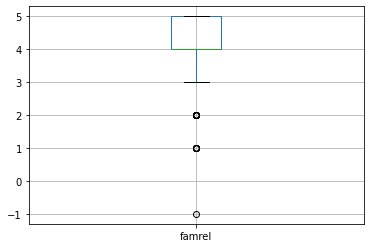

In [77]:
dk.famrel.plot(kind = 'box', grid = True)

Фэмили релейшеншип в основном хорошие, выбросами являются значения -1 (это бесспорно), 1 и 2. Значение 2 все же оставим, там  16 человек. Пустым ячейкам присвоим значение медианы (она примерно равна среднему значению)

In [78]:
dk.famrel.fillna(4.0, inplace = True)
dk = dk[(dk.famrel != -1.0) & (dk.famrel != 1.0)]

In [79]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      353 non-null    object 
 1   sex         353 non-null    object 
 2   age         353 non-null    int64  
 3   address     353 non-null    object 
 4   famsize     353 non-null    object 
 5   Pstatus     353 non-null    object 
 6   Medu        353 non-null    float64
 7   Fedu        353 non-null    float64
 8   Mjob        353 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      353 non-null    object 
 11  guardian    353 non-null    object 
 12  traveltime  353 non-null    float64
 13  studytime   353 non-null    float64
 14  failures    353 non-null    float64
 15  schoolsup   353 non-null    object 
 16  famsup      353 non-null    object 
 17  paid        353 non-null    object 
 18  activities  353 non-null    object 
 19  nursery     353 non-null    o

## Колонка freetime

count    344.000000
mean       3.220930
std        0.994459
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

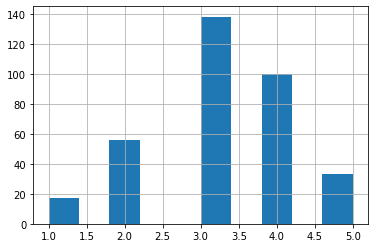

In [80]:
dk.freetime.hist()
dk.freetime.describe()

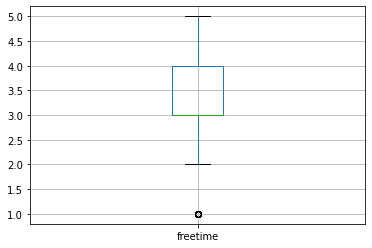

In [81]:
dk.freetime.plot(kind = 'box', grid = True)

Опять в выбросе много значений, если бы я все исключал, осталось бы наверное уже половина датасета. Оставляю. Пустые значения (2.5%) заполняю значением медианы

In [82]:
dk.freetime.fillna(3.0, inplace = True)

In [83]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      353 non-null    object 
 1   sex         353 non-null    object 
 2   age         353 non-null    int64  
 3   address     353 non-null    object 
 4   famsize     353 non-null    object 
 5   Pstatus     353 non-null    object 
 6   Medu        353 non-null    float64
 7   Fedu        353 non-null    float64
 8   Mjob        353 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      353 non-null    object 
 11  guardian    353 non-null    object 
 12  traveltime  353 non-null    float64
 13  studytime   353 non-null    float64
 14  failures    353 non-null    float64
 15  schoolsup   353 non-null    object 
 16  famsup      353 non-null    object 
 17  paid        353 non-null    object 
 18  activities  353 non-null    object 
 19  nursery     353 non-null    o

## Колонка goout

count    345.000000
mean       3.101449
std        1.093651
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

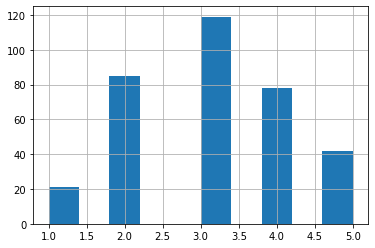

In [84]:
dk.goout.hist()
dk.goout.describe()

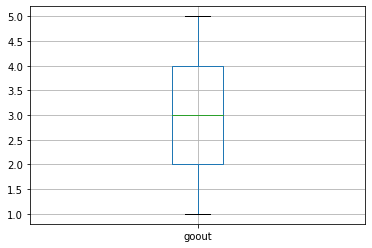

In [85]:
dk.goout.plot(kind = 'box', grid = True)

Выбросов нет. Нормальное такое распределение (каламбурчик'с, в настоящих отчетах места шуткам нет) 8 человек NaN-ов категорируем по медиане.

In [86]:
dk.goout.fillna(3.0, inplace = True)

In [87]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      353 non-null    object 
 1   sex         353 non-null    object 
 2   age         353 non-null    int64  
 3   address     353 non-null    object 
 4   famsize     353 non-null    object 
 5   Pstatus     353 non-null    object 
 6   Medu        353 non-null    float64
 7   Fedu        353 non-null    float64
 8   Mjob        353 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      353 non-null    object 
 11  guardian    353 non-null    object 
 12  traveltime  353 non-null    float64
 13  studytime   353 non-null    float64
 14  failures    353 non-null    float64
 15  schoolsup   353 non-null    object 
 16  famsup      353 non-null    object 
 17  paid        353 non-null    object 
 18  activities  353 non-null    object 
 19  nursery     353 non-null    o

## Колонка health

count    341.000000
mean       3.527859
std        1.381586
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

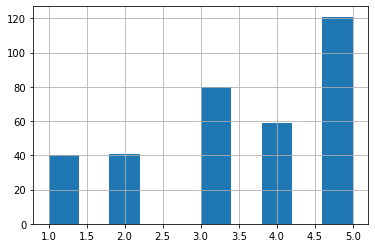

In [88]:
dk.health.hist()
dk.health.describe()

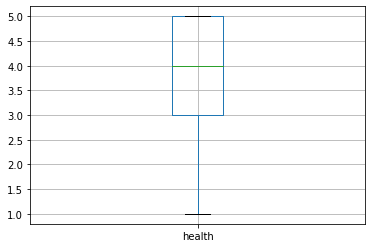

In [89]:
dk.health.plot(kind = 'box', grid = True)

Выбросов нет. Большинство детишек здоровы, хотя и с плохим здоровьем тоже не мало. 3% NaN-ов присвоим значение медианы

In [90]:
dk.health.fillna(3.0, inplace = True)

In [91]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      353 non-null    object 
 1   sex         353 non-null    object 
 2   age         353 non-null    int64  
 3   address     353 non-null    object 
 4   famsize     353 non-null    object 
 5   Pstatus     353 non-null    object 
 6   Medu        353 non-null    float64
 7   Fedu        353 non-null    float64
 8   Mjob        353 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      353 non-null    object 
 11  guardian    353 non-null    object 
 12  traveltime  353 non-null    float64
 13  studytime   353 non-null    float64
 14  failures    353 non-null    float64
 15  schoolsup   353 non-null    object 
 16  famsup      353 non-null    object 
 17  paid        353 non-null    object 
 18  activities  353 non-null    object 
 19  nursery     353 non-null    o

## Колонка absences

count    341.000000
mean       7.392962
std       24.771624
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

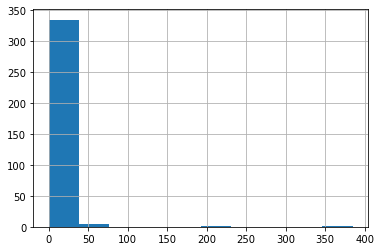

In [92]:
dk.absences.hist()
dk.absences.describe()

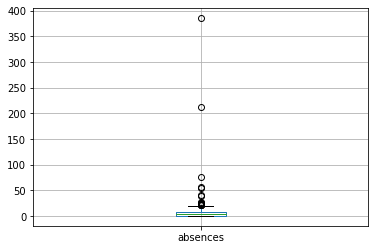

In [93]:
dk.absences.plot(kind = 'box', grid = True)

Выбросы есть и все выше третьего квартиля. Посчитаем границу выброса и отсечем ненужные значения

In [94]:
IQR = dk.absences.quantile(0.75) - dk.absences.quantile(0.25) # Межквартильный размах
above_outliers = dk.absences.quantile(0.75) + 1.5*IQR

dk = dk[(dk.absences < above_outliers)]

Возможно следовало сразу отбросить значения выше 100, а затем вычислять выбросы уже без этих сумасшедших значений? Надеюсь в комментариях к оценке вы мне это подскажете. В данном случае заполним пустые значения модой, т.к. выбросы очень сильно повлияли на медиану и среднее

In [95]:
dk.absences.fillna(0.0, inplace = True)

In [96]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      321 non-null    object 
 1   sex         321 non-null    object 
 2   age         321 non-null    int64  
 3   address     321 non-null    object 
 4   famsize     321 non-null    object 
 5   Pstatus     321 non-null    object 
 6   Medu        321 non-null    float64
 7   Fedu        321 non-null    float64
 8   Mjob        321 non-null    object 
 9   Fjob        321 non-null    object 
 10  reason      321 non-null    object 
 11  guardian    321 non-null    object 
 12  traveltime  321 non-null    float64
 13  studytime   321 non-null    float64
 14  failures    321 non-null    float64
 15  schoolsup   321 non-null    object 
 16  famsup      321 non-null    object 
 17  paid        321 non-null    object 
 18  activities  321 non-null    object 
 19  nursery     321 non-null    o

## Колонка score

count    316.000000
mean      51.867089
std       23.045739
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

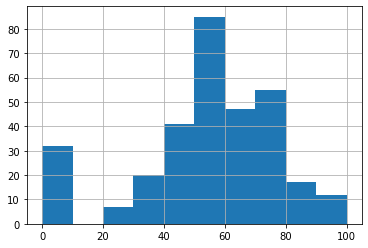

In [97]:
dk.score.hist()
dk.score.describe()

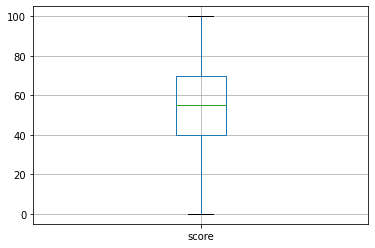

In [98]:
dk.score.plot(kind = 'box', grid = True)

Выбросов нет. Оценки превалируют средние от 40 до 80 по стобалльной системе. Особняком стоят группа балбесов (примерно 10%) которые не учаться совсем. Значением медианы заполним 1.5% NaN-ов и приступим к анализу

In [99]:
dk.score.fillna(dk.score.median(), inplace = True)

In [100]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      321 non-null    object 
 1   sex         321 non-null    object 
 2   age         321 non-null    int64  
 3   address     321 non-null    object 
 4   famsize     321 non-null    object 
 5   Pstatus     321 non-null    object 
 6   Medu        321 non-null    float64
 7   Fedu        321 non-null    float64
 8   Mjob        321 non-null    object 
 9   Fjob        321 non-null    object 
 10  reason      321 non-null    object 
 11  guardian    321 non-null    object 
 12  traveltime  321 non-null    float64
 13  studytime   321 non-null    float64
 14  failures    321 non-null    float64
 15  schoolsup   321 non-null    object 
 16  famsup      321 non-null    object 
 17  paid        321 non-null    object 
 18  activities  321 non-null    object 
 19  nursery     321 non-null    o

# Анализ данных

## Корреляционный анализ

In [102]:
dk.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.176670,-0.180180,0.124061,0.039629,0.195294,0.039263,0.056068,0.141868,-0.026869,0.114517,-0.161125
Medu,-0.176670,1.000000,0.632739,-0.137120,0.074522,-0.252464,0.015474,0.005703,0.042767,-0.011377,0.071188,0.186403
Fedu,-0.180180,0.632739,1.000000,-0.082527,-0.018376,-0.279556,-0.017641,-0.002341,0.025689,0.042333,0.006329,0.102611
traveltime,0.124061,-0.137120,-0.082527,1.000000,-0.121791,0.017550,-0.056101,-0.026862,-0.036140,-0.038581,-0.089674,-0.083172
studytime,0.039629,0.074522,-0.018376,-0.121791,1.000000,-0.121254,0.079508,-0.118561,-0.014171,-0.061916,-0.048313,0.130541
failures,0.195294,-0.252464,-0.279556,0.017550,-0.121254,1.000000,-0.020429,0.089132,0.009594,0.083281,0.081389,-0.304154
famrel,0.039263,0.015474,-0.017641,-0.056101,0.079508,-0.020429,1.000000,0.131847,0.038496,0.030369,-0.039211,0.069674
freetime,0.056068,0.005703,-0.002341,-0.026862,-0.118561,0.089132,0.131847,1.000000,0.253139,0.056375,0.069037,0.011911
goout,0.141868,0.042767,0.025689,-0.036140,-0.014171,0.009594,0.038496,0.253139,1.000000,0.022023,0.108292,-0.145097
health,-0.026869,-0.011377,0.042333,-0.038581,-0.061916,0.083281,0.030369,0.056375,0.022023,1.000000,0.035197,-0.030211


Корреляция по всем признакам в таблице довольно слабая можно сказать о небольшом влиянии приведенных параметров на оценки учеников. Хотя опыта у меня нет возможно полученные значения говорят о каком то влиянии на оценку
Пробежимся коротенечко по всем параметрам
1. Возраст: чем моложе тем лучше балл, но корреляция слабая (-0,16)
2. Образование матери и отца: есть тенденция, чем выше образование родителей, тем лучше оценки ученика 
3. Время в пути до школы: удивительно но чем дольше ехать до школы тем ниже балл. Коэф. -0,08
4. Внеклассные занятия положительно влияют на оценку, что логично. Коэф. 0,13
5. Глядя на этот показатель теперь думаю что выбросы надо было исключить (или нет), тем не менее видно что неудачи негативно влияют на оценку. Коэф. -0,3
6. Семейные отношения не сильно но влияют на оценки, но чем гармоничнее обстановка дома тем лучше учеба. Коэф. 0,06
7. Свободное время после школы практически не влияет на результат учебы. Коэф. 0,01
8. Проведенное время с друзьями негативно влияет на оценку, зато потом есть что вспомнить. Коэф. -0,145
9.  Здесь вряд ли можно ориентироваться на цифры, чем здоровей, тем хуже учиться? Коэф. -0,03
10. Чем больше занятий пропустил, тем больше оценка. Хм. Умники и так все знают, ходить на уроки не надо? Но корреляция все равно слабая 0,08

In [115]:
# Исключим колонки с коэффициентом корреляции лежащим в пределах -0,1:0,1 как незначительные
dk.drop(['traveltime', 'famrel', 'freetime', 'health', 'absences'], inplace = True, axis = 1)

## Анализ номинативных переменных

Коэффициент стьюдента пока не освоил, а копировать не понимая смысла не хочеться. Исправлюсь. Анализ проведу по боксплотам.

In [116]:
def draw_plot(column):
    fig, ax = plt.subplots(figsize = (6, 5))
    sns.boxplot(x=column, y='score', data=dk, ax=ax)
    
    ax.set_title('Зависимость оценки от ' + column)
    plt.show()

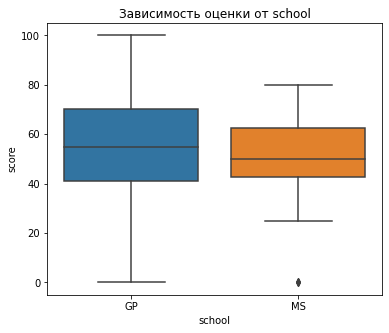

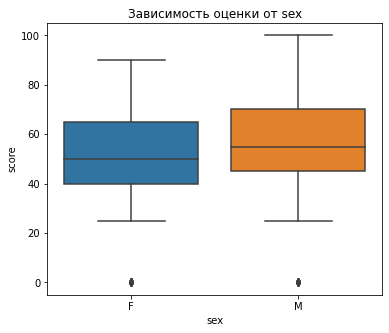

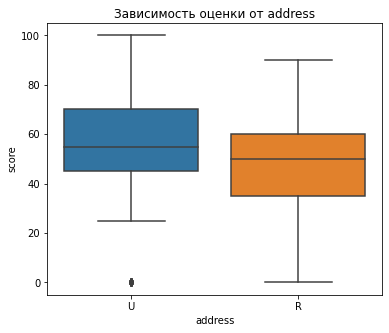

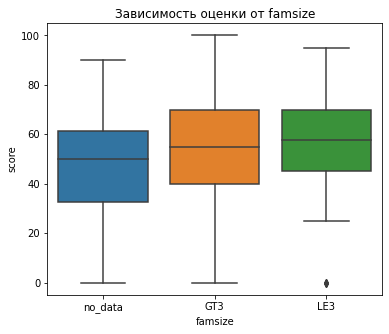

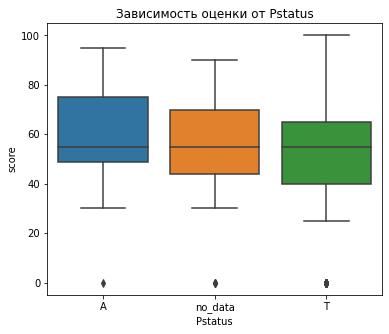

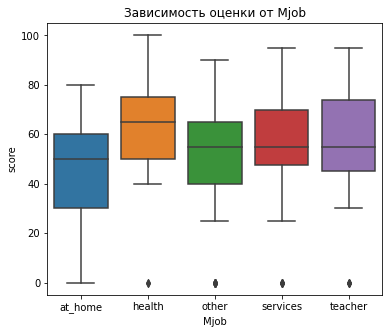

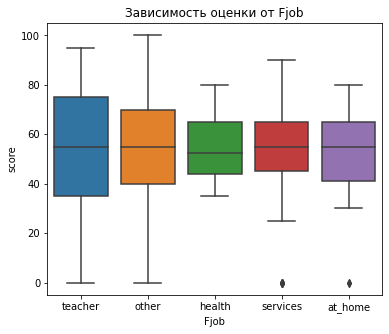

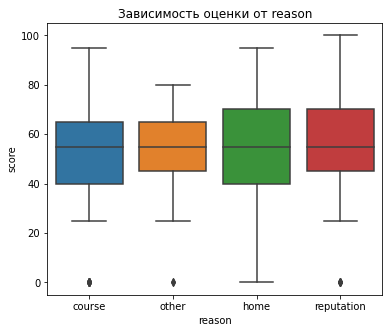

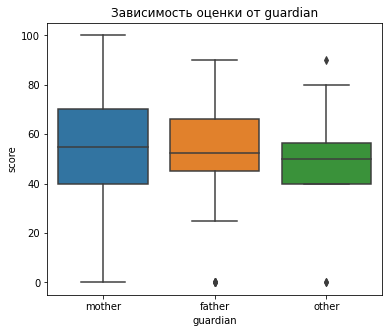

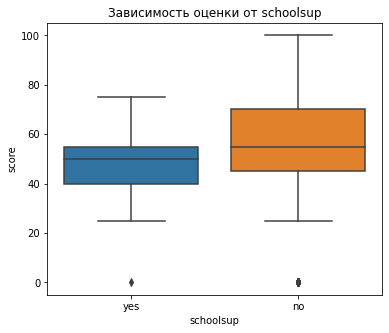

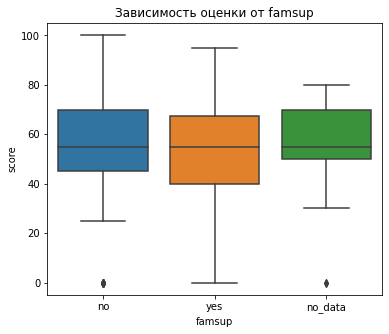

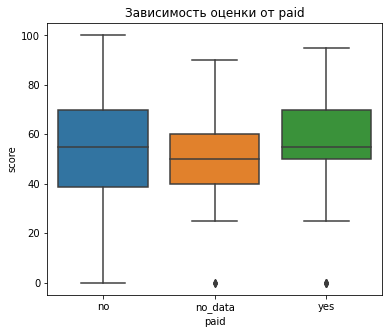

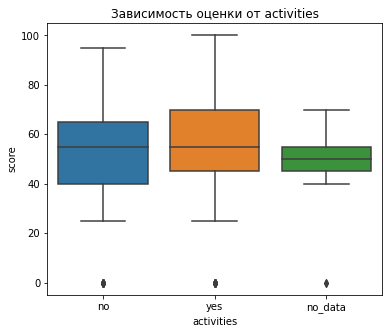

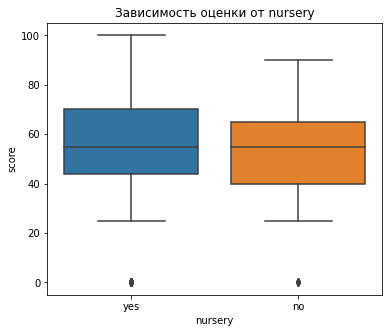

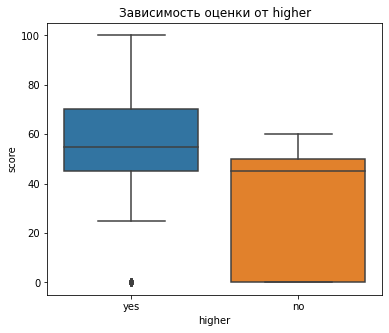

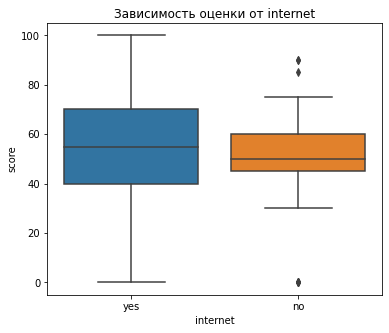

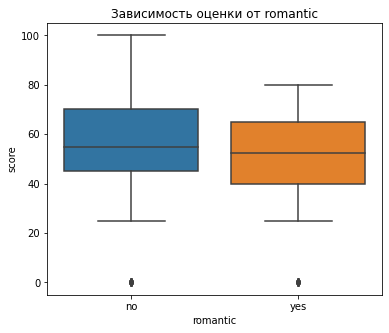

In [117]:
for nv in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
           'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    draw_plot(nv)

1. Зависимость от школы. В школе MS результаты более плотные у учеников средний уровень оценок. В GP разброс оценок больше, но и учеников там гораздо больше
2. Зависимость от пола. Мальчики в среднем учат математику чуть лучше
3. Зависимость от места проживания. Городские учаться немного лучше
4. Размер семьи. Практически не влияет на оценки
5. Совместное проживание родителей. Практически не влияет
6. У матерей врачей дети учаться сильно лучше остальных. У домохозяек хуже всех
7. От места работы отцов оценка не зависит
8. От причины выбора школы оценка не зависит
9. От опекунства оценка не зависит
10. От доп. образовательной поддержки оценка почти не зависит, с ней даже немного хуже
11. От семейной образовательной поддержки оценка не зависит
12. От платных занятий толку не много, но те кто ходит не получают совсем уж низкие оценки
13. От внеучебных занятий оценка не зависит
14. От посещения дет сада в прошлом оценка не зависит
15. Желание получить высшее образование мотивирует учиться лучше
16. У учеников без интернета почти нет экстремально низких и высоких значений оценок, но в целом это не влияет на результат
17. Наличие романтических отношений не влияет на оценку


По хорошему ничего кроме желания получить высшее образование и образования матерей не влияет на оценку. Отсеиваем безжалостно 15 колонок из 17

In [118]:
dk.drop(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
           'paid', 'activities', 'nursery', 'internet', 'romantic'], inplace = True, axis = 1)

In [119]:
# Вот все что осталось
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 394
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        321 non-null    int64  
 1   Medu       321 non-null    float64
 2   Fedu       321 non-null    float64
 3   Mjob       321 non-null    object 
 4   studytime  321 non-null    float64
 5   failures   321 non-null    float64
 6   higher     321 non-null    object 
 7   goout      321 non-null    float64
 8   score      321 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 35.1+ KB


# Итоги

В результате разведовательного анализа данных можно сделать следующие выводы:

1. В данных достаточно много выбросов и присутствуют пропуски. В результате фильтрации датасет "похудел" на 20% и некоторые пропуски были заполнены медианами или модами, что несколько снижает точность анализа
2. Подавляющее большинство условий жизни и учебы не влияют на успеваемость по математике. 
3. Тем не менее была выделена группа параметров оказывающих максимальное влияние на успеваемость. В эту группу вошли: образование родителей учащихся, место работы матерей, желание получать высшее образование, жизненные трудности (failures), проведение времени с друзьями, возраст учащихся. Таким образом для построения модели выявления учеников находящихся в группе риска предлагается использовать вышеописанные параметры.